# Introduction

This is my assessment for the UCD Course Data Analytics for Business. I have chosen a Formula 1 World Championship dataset, given my interest in this sport and since my fellow Dutchmen Max Verstappen won the F1 title for the first time in 2021. It was the first time ever someone from the Netherlands has won the F1 Championship and it was a truly extraordinary season with excitement, drama and chaos. That season deserves an analysis.
The 2022 championship has kicked off mid-March, so the timing of this project is great. I have based my analysis on the year of Max’s success in 2021. 

# Starting the Data Import and Setup

### Importing the libraries and data

In [1]:
# IMPORTING THE RELEVANT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# IMPORTING THE REQUIRED CSV FILES AND CREATING THE PANDA DATAFRAMES. I WILL IMPORT ONE CSV THROUGH RELATIONAL DATABASE, TO INDICATE THAT CAN BE DONE AS WELL. 

Results = pd.DataFrame(pd.read_csv(r'U:\UCD Course Data Analytics\Data\UCD Course - Formula 1 World Championship (1950 - 2021)\results.csv'))

Drivers = pd.DataFrame(pd.read_csv(r'U:\UCD Course Data Analytics\Data\UCD Course - Formula 1 World Championship (1950 - 2021)\drivers.csv'))

Standings = pd.DataFrame(pd.read_csv(r'U:\UCD Course Data Analytics\Data\UCD Course - Formula 1 World Championship (1950 - 2021)\driver_standings.csv'))

Pitstops = pd.DataFrame(pd.read_csv(r'U:\UCD Course Data Analytics\Data\UCD Course - Formula 1 World Championship (1950 - 2021)\pit_stops.csv'))

In [3]:
# IMPORTING ONE CSV FILE THROUGH THE "RELATIONAL DATABASE" APPROACH

from sqlalchemy import create_engine
Races = pd.DataFrame(pd.read_csv(r'U:\UCD Course Data Analytics\Data\UCD Course - Formula 1 World Championship (1950 - 2021)\races.csv', index_col=["raceId"]))

# Create the database engine
engine = create_engine('sqlite:///:memory:')

# Store the dataframe as a table
Races.to_sql('data_table', engine)

# Query 1 on the relational table, to show it works
Result1 = pd.read_sql_query('SELECT * FROM data_table', engine)
print('Result 1')
print(Result1)

# Query 2 on the relational table, to show you can take elements of the table
Result2 = pd.read_sql_query('SELECT RaceId,name FROM data_table group by RaceId', engine)
print('Result 2')
print(Result2)

Result 1
      raceId  year  round  circuitId                      name        date  \
0          1  2009      1          1     Australian Grand Prix  2009-03-29   
1          2  2009      2          2      Malaysian Grand Prix  2009-04-05   
2          3  2009      3         17        Chinese Grand Prix  2009-04-19   
3          4  2009      4          3        Bahrain Grand Prix  2009-04-26   
4          5  2009      5          4        Spanish Grand Prix  2009-05-10   
...      ...   ...    ...        ...                       ...         ...   
1075    1092  2022     19         22       Japanese Grand Prix  2022-10-09   
1076    1093  2022     20         69  United States Grand Prix  2022-10-23   
1077    1094  2022     21         32    Mexico City Grand Prix  2022-10-30   
1078    1095  2022     22         18      São Paulo Grand Prix  2022-11-13   
1079    1096  2022     23         24      Abu Dhabi Grand Prix  2022-11-20   

          time                                        

# Checking the Data

## Check for potential errors and changing some of the column names

In [4]:
# CHECKING THE "RACES" DATA FOR POTENTIAL ERRORS

Races.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 1 to 1096
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       1080 non-null   int64 
 1   round      1080 non-null   int64 
 2   circuitId  1080 non-null   int64 
 3   name       1080 non-null   object
 4   date       1080 non-null   object
 5   time       1080 non-null   object
 6   url        1080 non-null   object
dtypes: int64(3), object(4)
memory usage: 67.5+ KB


No errors or missing values recorded in above RACES dataframe. I do want to rename the "time" column to "race_start_time", as it is confusing what "time" means here. I will change the column name below. I also want to delete the "url" column to remove clutter.

In [5]:
# Changing the column name "time" to "race_start_time" as explained above
Races.rename(columns={'time': 'race_start_time'}, inplace=True)

# Drop the url column to remove clutter
Races = Races.drop(columns=['url']) 

# Checking the new column headers below.
Races.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 1 to 1096
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             1080 non-null   int64 
 1   round            1080 non-null   int64 
 2   circuitId        1080 non-null   int64 
 3   name             1080 non-null   object
 4   date             1080 non-null   object
 5   race_start_time  1080 non-null   object
dtypes: int64(3), object(3)
memory usage: 59.1+ KB


In [6]:
# CHECKING THE "RESULTS" DATA FOR POTENTIAL ERRORS
Results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3   constructorId    25399 non-null  int64  
 4   number           25399 non-null  object 
 5   grid             25399 non-null  int64  
 6   position         25399 non-null  object 
 7   positionText     25399 non-null  object 
 8   positionOrder    25399 non-null  int64  
 9   points           25399 non-null  float64
 10  laps             25399 non-null  int64  
 11  time             25399 non-null  object 
 12  milliseconds     25399 non-null  object 
 13  fastestLap       25399 non-null  object 
 14  rank             25399 non-null  object 
 15  fastestLapTime   25399 non-null  object 
 16  fastestLapSpeed  25399 non-null  object 
 17  statusId    

No errors or missing values recorded in above RESULTS dataframe. I also want to rename two columns here to avoid confusion later.
The two columns are: "time" and "milliseconds". I will change "Time" to "race_result_time", as it is confusing what "time" means here. I will also change the column name "milliseconds" to "milliseconds_race" to make sure we know this column belongs to the race itself (and not the pitstops, as we will see later on). 

In [7]:
# Setting the index column for RESULTS
#Results.set_index('resultId')

In [8]:
# Changing the column name "time" to "race_start_time" as explained above. 
# And also changing the "milliseconds" column to show this belongs to the race, as I noticed further on that the PITSTOPS dataframe has the same named column.
Results.rename(columns={'time': 'race_result_time', 'milliseconds': 'milliseconds_race'}, inplace=True)

#Checking the new column headers below.
Results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   resultId           25399 non-null  int64  
 1   raceId             25399 non-null  int64  
 2   driverId           25399 non-null  int64  
 3   constructorId      25399 non-null  int64  
 4   number             25399 non-null  object 
 5   grid               25399 non-null  int64  
 6   position           25399 non-null  object 
 7   positionText       25399 non-null  object 
 8   positionOrder      25399 non-null  int64  
 9   points             25399 non-null  float64
 10  laps               25399 non-null  int64  
 11  race_result_time   25399 non-null  object 
 12  milliseconds_race  25399 non-null  object 
 13  fastestLap         25399 non-null  object 
 14  rank               25399 non-null  object 
 15  fastestLapTime     25399 non-null  object 
 16  fastestLapSpeed    253

In [9]:
# CHECKING THE "DRIVERS" DATA FOR POTENTIAL ERRORS
Drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


In [10]:
# Setting the index column for DRIVERS
Drivers.set_index('driverRef')

,driverId,number,code,forename,surname,dob,nationality,url
driverRef,,,,,,,,
hamilton,1,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
heidfeld,2,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
rosberg,3,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
alonso,4,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
kovalainen,5,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...
aitken,851,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
tsunoda,852,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
mazepin,853,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin


No errors or missing values recorded in above DRIVERS dataframe. However, I would like to concatenate the "forename" and "surname" columns into one "full name" column, and then drop both the "forename" and "surname" columns as we no longer need them.

In [11]:
# Changing the two columns "forename" and "surname" into one new "full name" column as described above
Drivers['full_name'] = Drivers['forename'] +' '+ Drivers['surname']

# Drop the two name columns as we no longer need them as we created a new "full name" column. 
# Dropping "url" to remove clutter
Drivers = Drivers.drop(columns=['forename','surname','url']) 

# Change the order of the columns to have "full name" sitting next to their driver number instead of at the end.
Drivers_new = Drivers[['driverId','number','full_name','code','dob','nationality']]

# Checking the new output
Drivers_new.info()
Drivers_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   number       854 non-null    object
 2   full_name    854 non-null    object
 3   code         854 non-null    object
 4   dob          854 non-null    object
 5   nationality  854 non-null    object
dtypes: int64(1), object(5)
memory usage: 40.2+ KB


,driverId,number,full_name,code,dob,nationality
0,1,44,Lewis Hamilton,HAM,1985-01-07,British
1,2,\N,Nick Heidfeld,HEI,1977-05-10,German
2,3,6,Nico Rosberg,ROS,1985-06-27,German
3,4,14,Fernando Alonso,ALO,1981-07-29,Spanish
4,5,\N,Heikki Kovalainen,KOV,1981-10-19,Finnish


In [12]:
# CHECKING THE "PITSTOP" DATA FOR POTENTIAL ERRORS
Pitstops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8828 entries, 0 to 8827
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        8828 non-null   int64 
 1   driverId      8828 non-null   int64 
 2   stop          8828 non-null   int64 
 3   lap           8828 non-null   int64 
 4   time          8828 non-null   object
 5   duration      8828 non-null   object
 6   milliseconds  8828 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 482.9+ KB


No errors or missing values recorded in above PITSTOPS dataframe. 
I do want to change the "milliseconds" column header to "milliseconds_pitstops", as we also have a similar milliseconds column header in the RESULTS dataframe. This will avoid confusion.

In [13]:
# Setting the index column for PITSTOPS
Pitstops.set_index('raceId')

,driverId,stop,lap,time,duration,milliseconds
raceId,,,,,,
841,153,1,1,17:05:23,26.898,26898
841,30,1,1,17:05:52,25.021,25021
841,17,1,11,17:20:48,23.426,23426
841,4,1,12,17:22:34,23.251,23251
841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...
1073,840,2,52,18:22:55,22.661,22661
1073,815,3,53,18:23:09,21.385,21385
1073,854,2,52,18:23:42,22.070,22070


In [14]:
# Changing the column name "milliseconds" to "milliseconds_pitstop" as described above
Pitstops.rename(columns={'milliseconds': 'milliseconds_pitstops'}, inplace=True)

# Checking the new column header
Pitstops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8828 entries, 0 to 8827
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   raceId                 8828 non-null   int64 
 1   driverId               8828 non-null   int64 
 2   stop                   8828 non-null   int64 
 3   lap                    8828 non-null   int64 
 4   time                   8828 non-null   object
 5   duration               8828 non-null   object
 6   milliseconds_pitstops  8828 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 482.9+ KB


In [15]:
# CHECKING THE "STANDINGS" DATA FOR POTENTIAL ERRORS
Standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33394 entries, 0 to 33393
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33394 non-null  int64  
 1   raceId             33394 non-null  int64  
 2   driverId           33394 non-null  int64  
 3   points             33394 non-null  float64
 4   position           33394 non-null  int64  
 5   positionText       33394 non-null  object 
 6   wins               33394 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


No errors or missing values recorded in above STANDINGS dataframe.

# Merging DataFrames

To analyse the imported data, we will need to merge some of these dataframes. For example: the RESULTS dataframe only contains "driverId" and not the driver's name. The DRIVERS dateframe contains "driverId" and "full_name", which will allow us to combine the two dataframes and put a driver's name to a race result. There are more examples like that and I will merge the dataframes in this section accordingly. 

In [16]:
# MERGING THE "DRIVERS_NEW" AND "RESULTS" DATAFRAMES, TO GET A NAME TO THE RESULT.

# As both dataframes contain "driverId" and "number", I will use both fields to merge the data and to avoid duplicate columns.
# I will use the LEFT join, since I want to review the race results and what drivers were involved. As our starting point is the race results, we only need to keep those rows from DRIVERS that match the RESULTS.
Driver_Results = pd.merge(Results, Drivers_new, on=['driverId','number'], how='left')

# Check to see if the merge worked well:
Driver_Results.info()
Driver_Results.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25399 entries, 0 to 25398
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   resultId           25399 non-null  int64  
 1   raceId             25399 non-null  int64  
 2   driverId           25399 non-null  int64  
 3   constructorId      25399 non-null  int64  
 4   number             25399 non-null  object 
 5   grid               25399 non-null  int64  
 6   position           25399 non-null  object 
 7   positionText       25399 non-null  object 
 8   positionOrder      25399 non-null  int64  
 9   points             25399 non-null  float64
 10  laps               25399 non-null  int64  
 11  race_result_time   25399 non-null  object 
 12  milliseconds_race  25399 non-null  object 
 13  fastestLap         25399 non-null  object 
 14  rank               25399 non-null  object 
 15  fastestLapTime     25399 non-null  object 
 16  fastestLapSpeed    253

resultId                 0
raceId                   0
driverId                 0
constructorId            0
number                   0
grid                     0
position                 0
positionText             0
positionOrder            0
points                   0
laps                     0
race_result_time         0
milliseconds_race        0
fastestLap               0
rank                     0
fastestLapTime           0
fastestLapSpeed          0
statusId                 0
full_name            22071
code                 22071
dob                  22071
nationality          22071
dtype: int64

From the above ISNULL analysis we can see that tehre are 22071 records without a FULL_NAME in this new dataframe. We will drop those from the analysis as we cannot see who those records belong too (as the driver name is missing).

In [17]:
# WE WILL NOW DROP THE NAN/NULL VALUES FROM THE ABOVE DATAFRAME
Driver_Results_dropna = Driver_Results.dropna()

# Here we can see what the new dataframe looks like
# It is a big drop in the data, however it does not affect our preferred dataset as used below (verified)
Driver_Results_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3328 entries, 7553 to 25398
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   resultId           3328 non-null   int64  
 1   raceId             3328 non-null   int64  
 2   driverId           3328 non-null   int64  
 3   constructorId      3328 non-null   int64  
 4   number             3328 non-null   object 
 5   grid               3328 non-null   int64  
 6   position           3328 non-null   object 
 7   positionText       3328 non-null   object 
 8   positionOrder      3328 non-null   int64  
 9   points             3328 non-null   float64
 10  laps               3328 non-null   int64  
 11  race_result_time   3328 non-null   object 
 12  milliseconds_race  3328 non-null   object 
 13  fastestLap         3328 non-null   object 
 14  rank               3328 non-null   object 
 15  fastestLapTime     3328 non-null   object 
 16  fastestLapSpeed    3

In [18]:
# MERGING THE RACES DATAFRAME INTO THE NEWLY CREATED DATAFRAME ABOVE WILL ALLOW US TO SEE THE NAME OF THE RACE VS THE RESULT VS THE DRIVER

# The matching column is "raceId", which I will use to merge the dataframes. 
# I will use the LEFT join, since I want to review the race results per race. As our starting point are the results, we only need to keep those rows from RACES that match the DRIVERS_RESULTS.
Race_Results = pd.merge(Driver_Results_dropna, Races, on=['raceId'], how='left')

# Check to see if the merge worked well:
Race_Results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3328 entries, 0 to 3327
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   resultId           3328 non-null   int64  
 1   raceId             3328 non-null   int64  
 2   driverId           3328 non-null   int64  
 3   constructorId      3328 non-null   int64  
 4   number             3328 non-null   object 
 5   grid               3328 non-null   int64  
 6   position           3328 non-null   object 
 7   positionText       3328 non-null   object 
 8   positionOrder      3328 non-null   int64  
 9   points             3328 non-null   float64
 10  laps               3328 non-null   int64  
 11  race_result_time   3328 non-null   object 
 12  milliseconds_race  3328 non-null   object 
 13  fastestLap         3328 non-null   object 
 14  rank               3328 non-null   object 
 15  fastestLapTime     3328 non-null   object 
 16  fastestLapSpeed    3328 

In [19]:
# FINALLY WE WILL ADD PITSTOPS TO THE SAME DATAFRAME, AND WE HAVE ALL DATA - EXCEPT STANDINGS - MERGED INTO ONE DATAFRAME. THIS WILL ALLOW EASIER USAGE LATER ON
 
# As both dataframes contain "raceId" and "driverId", I will use both fields to merge the data and thus avoid duplicates.
Assessment_data_v1 = pd.merge(Pitstops, Race_Results, on=['raceId','driverId'], how='left')

# Check to see if the merge worked well:
Assessment_data_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8828 entries, 0 to 8827
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   raceId                 8828 non-null   int64  
 1   driverId               8828 non-null   int64  
 2   stop                   8828 non-null   int64  
 3   lap                    8828 non-null   int64  
 4   time                   8828 non-null   object 
 5   duration               8828 non-null   object 
 6   milliseconds_pitstops  8828 non-null   int64  
 7   resultId               5839 non-null   float64
 8   constructorId          5839 non-null   float64
 9   number                 5839 non-null   object 
 10  grid                   5839 non-null   float64
 11  position               5839 non-null   object 
 12  positionText           5839 non-null   object 
 13  positionOrder          5839 non-null   float64
 14  points                 5839 non-null   float64
 15  laps

In [20]:
# NOW I WANT TO SORT THE NEW MERGED DATAFRAME AND ASSIGN A NEW INDEX COLUMN.

# Sorting the dataframe by "data" allows us to see the chronological order of the races, which we can later use when adding the results to graphs
Assessment_data_v1.sort_values('date', ascending=False)

# Assigning a new index column - to "full_name" allows us to see all results related to the driver's name when looking at the data.
Assessment_data_v2 = Assessment_data_v1.set_index('full_name') 

# Analysing the Data Results

## Race results and driver standings

I want to start by looking at the final championship results of 2021. The year of the epic battle between Lewis Hamilton and Max Verstappen. Even non-Formula1 fans have heard about this battle, since it went to far extremes that year. 

In [21]:
# TO LOOK AT THE 2021 RESULTS OF THE DRIVERS STANDINGS, WE NEED TO MERGE THE "STANDINGS" DATAFRAME WITH THE "DRIVERS" DATAFRAME FIRST.

# Merging dataframes DRIVERS and STANDINGS, with a LEFT join as we only need to see those drivers that are reflected in the standings.
merge_driver_standings_v1 = pd.merge(Standings, Drivers_new, on=['driverId'], how='left')

# Merging this new dataframe with RACES to allow us to filter for the relevant year(s). Note: Standings does not have a date column
merge_standings_races_v1 = pd.merge(merge_driver_standings_v1, Races, on=['raceId'], how='left')

# I will now sort this data by points to allow for a clear distribution across the graph
Standings_sorted = merge_standings_races_v1.sort_values('points', ascending=False)

# To look at 2021 only, I will now filter down this new dataframe to that year only. 
Standings_2021 = Standings_sorted[Standings_sorted['year']==2021]

# Let's see the output of this new dataframe before we proceed on the graphics
Standings_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 33354 to 32967
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  450 non-null    int64  
 1   raceId             450 non-null    int64  
 2   driverId           450 non-null    int64  
 3   points             450 non-null    float64
 4   position           450 non-null    int64  
 5   positionText       450 non-null    object 
 6   wins               450 non-null    int64  
 7   number             450 non-null    object 
 8   full_name          450 non-null    object 
 9   code               450 non-null    object 
 10  dob                450 non-null    object 
 11  nationality        450 non-null    object 
 12  year               450 non-null    int64  
 13  round              450 non-null    int64  
 14  circuitId          450 non-null    int64  
 15  name               450 non-null    object 
 16  date               4

Looking at the above outcome, there are no errors or null values in this new subset of the dataframe.

GRAPH 1


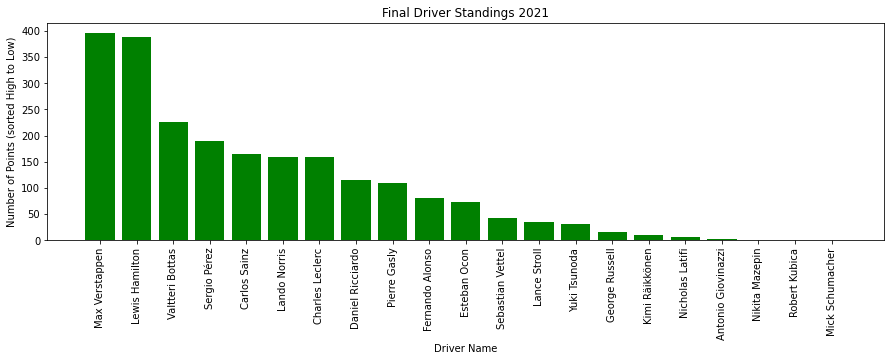

In [77]:
# PLOTTING THE 2021 DRIVER STANDINGS

# Plot the data using bar() method
plt.figure(figsize=(15,4))
plt.bar(Standings_2021.iloc[:, 8], Standings_2021.iloc[:, 3], color='g')
plt.title('Final Driver Standings 2021')
plt.xlabel('Driver Name')
plt.xticks(rotation=90)
plt.ylabel('Number of Points (sorted High to Low)')
  
# Show the plot
print('GRAPH 1')
plt.show()

It is very clear from above bar chart that is has been a close contest between the top 2 contenders, given they finished 2021 so close to each other in points. Let's see their actual points for 2021 and compare them.

In [23]:
# TO HIGHLIGHT HOW CLOSE IT WAS AT THE TOP 2, I AM NOW SHOWING THE FINAL POINTS OF BOTH MAX AND LEWIS.
Max = Standings_2021[Standings_2021.full_name == 'Max Verstappen']
Lewis = Standings_2021[Standings_2021.full_name == 'Lewis Hamilton']
print('Max Verstappen:', end = ' ')
print(Max['points'].max())
print('Lewis Hamilton:', end = ' ')
print(Lewis['points'].max())
print('A small difference of', end = ' ')
print(abs(Max['points'].max()-Lewis['points'].max()), end = ' ')
print('points over a total of', end = ' ')
print(Standings_2021['round'].max(), end = ' ')
print('races in 2021.')

Max Verstappen: 395.5
Lewis Hamilton: 387.5
A small difference of 8.0 points over a total of 22 races in 2021.


As the top 2 drivers ended so close to each other in points, this requires a further analysis to see how close they were throughout the year.
Did they compete all year round, or did one of them run away with it and the other driver caught up at the end?
Let's see what happened in the following analysis.

GRAPH 2


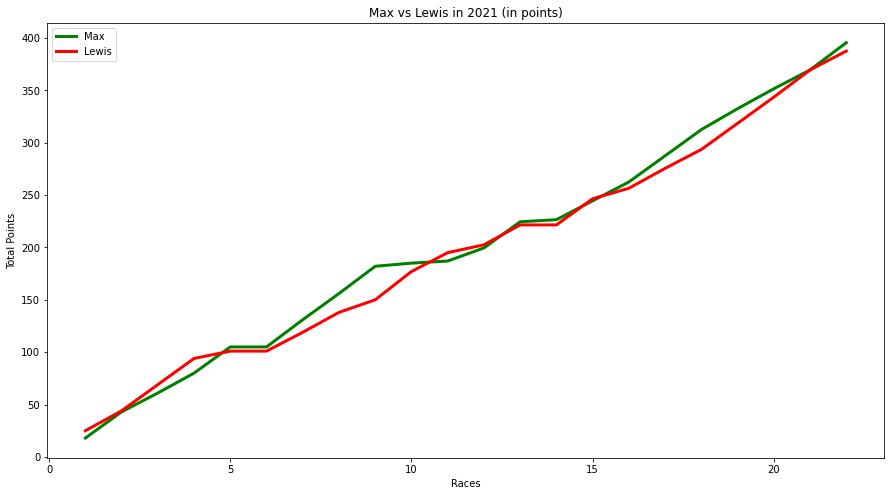

In [78]:
# COMPARE THE RESULTS OF BOTH DRIVERS THROUGHOUT THE 2021 SEASON

# I now want to compare the results across the races in 2021, to see how both drivers competed with each other
fig, ax = plt.subplots() 
ax.plot(Max['round'], Max['points'], color='g', linewidth=3, label='Max')
ax.plot(Lewis['round'], Lewis['points'], color='r', linewidth=3,label='Lewis')
ax.set_xlabel('Races')
ax.set_ylabel('Total Points')
ax.set_title('Max vs Lewis in 2021 (in points)')
leg = ax.legend()
fig.set_size_inches([15, 8]) 
print('GRAPH 2')
plt.show() 

You can see in the above graph, that both drivers have been competing all year round, where Max Verstappen seems to have found an advantage around race 8, which soon dissolved and from around race 10 the two lines continue to stay very close together again.

GRAPH 3


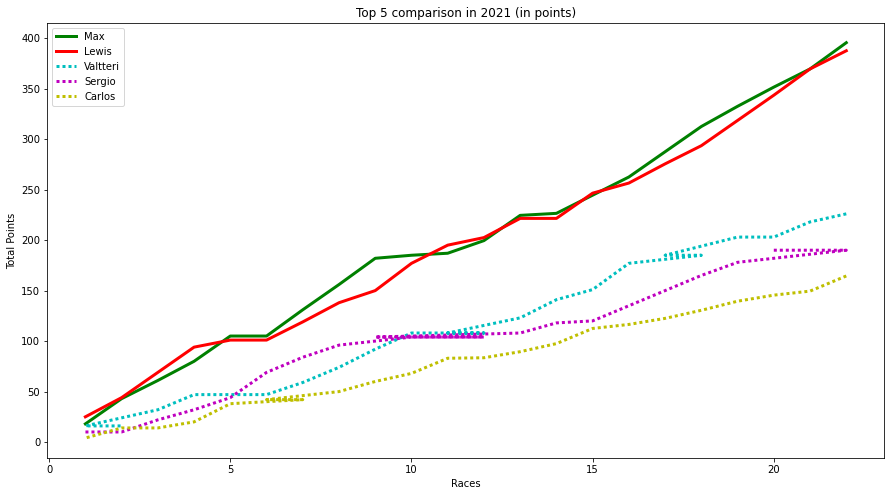

In [79]:
# COMPARE THE RESULTS OF THE TOP 5 DRIVERS, JUST TO SEE HOW QUICK BOTH TOP2 DRIVERS "DROVE AWAY" FROM THE REST THROUGHOUT THE 2021 SEASON

# Creating the 3 additional subsets of data to complete the top 5. These 3 names are taken from above bar chart with the 2021 driver standings
Valtteri = Standings_2021[Standings_2021.full_name == 'Valtteri Bottas']
Sergio = Standings_2021[Standings_2021.full_name == 'Sergio Pérez']
Carlos = Standings_2021[Standings_2021.full_name == 'Carlos Sainz']

# I now want to compare the results across the races in 2021, to see how all 5 drivers competed with each other
fig, ax = plt.subplots() 
ax.plot(Max['round'], Max['points'], color='g', linewidth=3, label='Max')
ax.plot(Lewis['round'], Lewis['points'], color='r', linewidth=3,label='Lewis')
ax.plot(Valtteri['round'], Valtteri['points'], color='c', linewidth=3,label='Valtteri', linestyle=(0, (1, 1)))
ax.plot(Sergio['round'], Sergio['points'], color='m', linewidth=3,label='Sergio', linestyle=(0, (1, 1)))
ax.plot(Carlos['round'], Carlos['points'], color='y', linewidth=3,label='Carlos', linestyle=(0, (1, 1)))
ax.set_xlabel('Races')
ax.set_ylabel('Total Points')
ax.set_title('Top 5 comparison in 2021 (in points)')
leg = ax.legend()
fig.set_size_inches([15, 8]) 
print('GRAPH 3')
plt.show() 

The above dotted lines show the other 3 drivers (Valtteri, Sergio and Carlos) in the top 5 finished in the 2021 Formula 1 season.
The dotted lines that move back and forth, mean that those drivers did not get any points in 2 or more consecutive races. 
We note in the above graph that from the very first race, Max and Lewis "drove away" from their other competitors. Around race 6-7 it was Sergio Perez that came a little closer to both Max and Lewis, but after that the gap between the top2 and the other 3 grew larger and larger. I will now compare the competition between Max and Lewis further, by looking at previous year's results.

In [26]:
# I WOULD LIKE TO COMPARE POINTS FOR MAX AND LEWIS IN ALL YEARS THAT BOTH MAX VERSTAPPEN AND LEWIS HAMILTON RACED TOGETHER. WE KNOW NOW THAT 2021 WAS A CLOSE SEASON, BUT HOW DID THE OTHER SEASONS END?

# Let's start by finding out in what year Max Verstappen and Lewis Hamilton joined Formula 1
Max_all_years_v1 = Standings_sorted[Standings_sorted.full_name == 'Max Verstappen']
Max_start_year = Max_all_years_v1['year'].min()
Lewis_all_years_v1 = Standings_sorted[Standings_sorted.full_name == 'Lewis Hamilton']
Lewis_start_year = Lewis_all_years_v1['year'].min()
print('Max Verstappen started in year', end = ' ')
print(Max_start_year, end = '')
print(', while Lewis Hamilton started in year', end = ' ')
print(Lewis_start_year)

Max Verstappen started in year 2015, while Lewis Hamilton started in year 2007


Now that we know that Max started in 2015 and Lewis in 2007, I want to compare their results since 2015 only, since Max wasn't present in F1 before that.

GRAPH 4


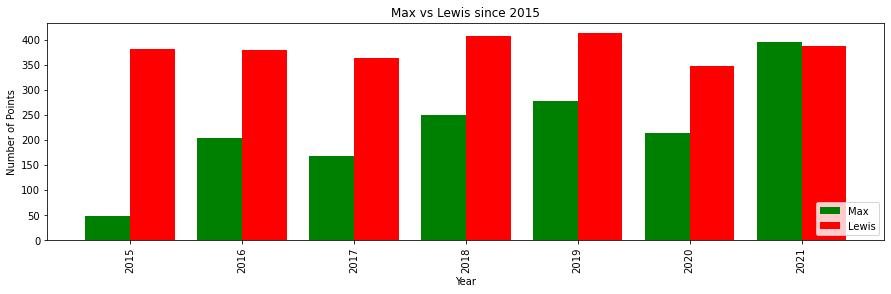

In [80]:
# WE WILL NEED TO FILTER THE STANDING RESULTS FOR THE YEARS 2015 AND LATER

# To look at all years since 2015, I will now filter down the dataframe accordingly. 
Standings_v1 = Standings_sorted[Standings_sorted['year']>2014] # as Max started in 2015 and that will be our starting point for this particular analysis
Standings_since2015 = Standings_v1[Standings_v1['year']<2022] # as we have not raced in 2022 when I started this analysis

# COMPARING MAX VS LEWIS THROUGHOUT THE YEAR
Max_since2015 = Standings_since2015[Standings_since2015.full_name == 'Max Verstappen']
Lewis_since2015 = Standings_since2015[Standings_since2015.full_name == 'Lewis Hamilton']

# Plot the data using bar() method
plt.figure(figsize=(15,4))
plt.bar(Max_since2015['year']-0.2, Max_since2015['points'], width=0.4, color='g', label = 'Max') #to allow both columns to be presented alongside
plt.bar(Lewis_since2015['year']+0.2, Lewis_since2015['points'], width=0.4, color='r', label = 'Lewis') #to allow both columns to be presented alongside
plt.title('Max vs Lewis since 2015')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.ylabel('Number of Points')
# Show the plot
print('GRAPH 4')
plt.show()

In [93]:
print('Max Results since 2015')
print(Max_since2015.groupby(['year'])['points'].max()) # showing the max values per year

print((Max_since2015.groupby(['year'])['points'].max().mean())) # showing the mean value across these years

Max Results since 2015
year
2015     49.0
2016    204.0
2017    168.0
2018    249.0
2019    278.0
2020    214.0
2021    395.5
Name: points, dtype: float64
222.5


In [92]:
print('Lewis Results since 2015')
print(Lewis_since2015.groupby(['year'])['points'].max()) # showing the max values per year
      
print((Lewis_since2015.groupby(['year'])['points'].max().mean())) # showing the mean value across these years

Lewis Results since 2015
year
2015    381.0
2016    380.0
2017    363.0
2018    408.0
2019    413.0
2020    347.0
2021    387.5
Name: points, dtype: float64
382.7857142857143


Looking at above graph - and the 2 printed outputs - with all results since 2015 for Max and Lewis, it looks like Max has outperformed himself in 2021 compared to all previous years. His total points in 2021 appear much higher than other years.
Lewis 2021 result was better than his points-total in years 2015, 2016 and 2017. 
Now I would like to see the number of wins and podium places in 2021 itself.

GRAPH 5


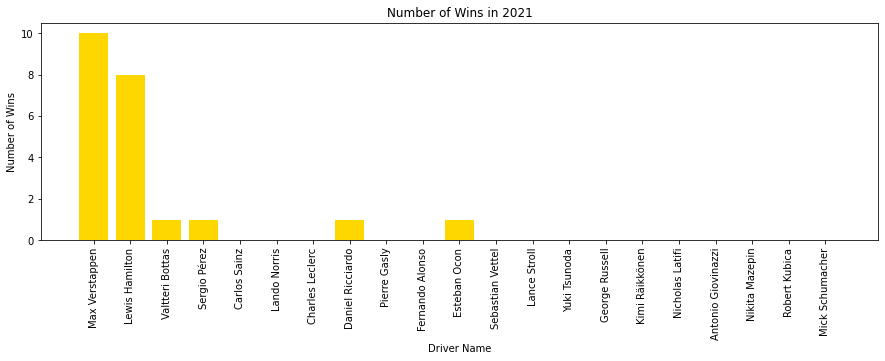

In [81]:
# SHOWING THE NUMBER OF WINS FIRST

# To do this, we can use the same Standings dataframe we created above. This dataframe contains the WINS column that we can look at

# Plot the data using bar() method
plt.figure(figsize=(15,4))
plt.bar(Standings_2021['full_name'], Standings_2021['wins'], color='gold')
plt.title('Number of Wins in 2021')
plt.xlabel('Driver Name')
plt.xticks(rotation=90)
plt.ylabel('Number of Wins')
  
# Show the plot
print('GRAPH 5')
plt.show()

Above graph shows us that both Max and Lewis were very close in race wins (10 vs 8), whereas other drivers only won a race once each. A very close battle between just two drivers all year round!

## Pitstops and race wins

As we can now see who won the most races and the championship, let's also look at the pitstops and merely the pitstop speed. Did the pitstop speed have an influence on the race results?
Did either one of the two contenders have a faster pitstop throughout the year?

In [31]:
# WE WILL NEED TO CONNECT THE PITSTOPS DATAFRAME TO DRIVER STANDINGS AND THE RACES DATAFRAMES.

# First we will connect the Pitstops to the Standings, on both raceId and driverId - as both columns appear in both dataframes
Driver_Pitstops_v1 = pd.merge(Pitstops, Standings, on=['raceId', 'driverId'], how='left') 

# Now we will connect this new dataframe to the DRIVERS_NEW dataframe we created earlier, to allow us to connect a name to the result
Driver_Pitstops_v2 = pd.merge(Driver_Pitstops_v1, Drivers_new, on=['driverId'], how='left')

# Lastly we need to add in the RACES dataframe, to enable us to filter for the relevant year
Driver_Pitstops_v3 = pd.merge(Driver_Pitstops_v2, Races, on=['raceId'], how='left')
Driver_Pitstops = Driver_Pitstops_v3[Driver_Pitstops_v3['year']==2021]

In [39]:
Driver_Pitstops.info()
Driver_Pitstops.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 8030 to 8827
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   raceId                 798 non-null    int64  
 1   driverId               798 non-null    int64  
 2   stop                   798 non-null    int64  
 3   lap                    798 non-null    int64  
 4   time                   798 non-null    object 
 5   duration               798 non-null    object 
 6   milliseconds_pitstops  798 non-null    int64  
 7   driverStandingsId      798 non-null    float64
 8   points                 798 non-null    float64
 9   position               798 non-null    float64
 10  positionText           798 non-null    object 
 11  wins                   798 non-null    float64
 12  number                 798 non-null    object 
 13  full_name              798 non-null    object 
 14  code                   798 non-null    object 
 15  do

raceId                   0
driverId                 0
stop                     0
lap                      0
time                     0
duration                 0
milliseconds_pitstops    0
driverStandingsId        0
points                   0
position                 0
positionText             0
wins                     0
number                   0
full_name                0
code                     0
dob                      0
nationality              0
year                     0
round                    0
circuitId                0
name                     0
date                     0
race_start_time          0
dtype: int64

GRAPH 6


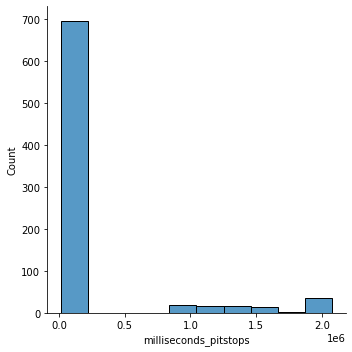

In [82]:
# WE CAN NOW CHECK THE NEW PITSTOP DATAFRAME FOR THE DISTRIBUTION OF THE PITSTOP SPEED

sns.displot(Driver_Pitstops["milliseconds_pitstops"],bins=10,kde=False)
print('GRAPH 6')
plt.show()

GRAPH 7


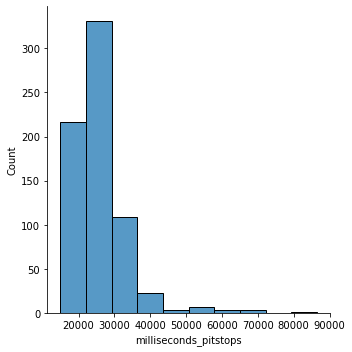

In [83]:
# THIS PITSTOP DATA FOR SPEED SEEMS TO CONTAIN SEVERAL OUTLIERS. LOOKING AT THIS DATA - IN MILLISECONDS - WE CAN SEE THAT THE VAST MAJORITY SITS WITHIN THE ONE BIG BUCKET AND THE REST APPEARS TO BE AN OUTLIER.

# We will need to remove those outliers to get a better analysis. 
# These outliers most likely contain pitstops with big failures or total "Did Not Finish" results
# I did an outlier analysis with Python but that did not cut the mustard, as it kept too many outliers in play
# I have decided to allocate an outlier cut-off manually: anything over 100000 milliseconds is considered an outlier for this exercise
Driver_Pitstops_no_outliers = Driver_Pitstops[(Driver_Pitstops['milliseconds_pitstops'] < 100000)]

# We can now show the new distribution of the pitstop speed in milliseconds
sns.displot(Driver_Pitstops_no_outliers["milliseconds_pitstops"],bins=10,kde=False)
print('GRAPH 7')
plt.show()

This new distribution seems far more reflective of the actual "correct" pitstop speed than the previous distribution did. We can use this data to add to our analysis.

GRAPH 8


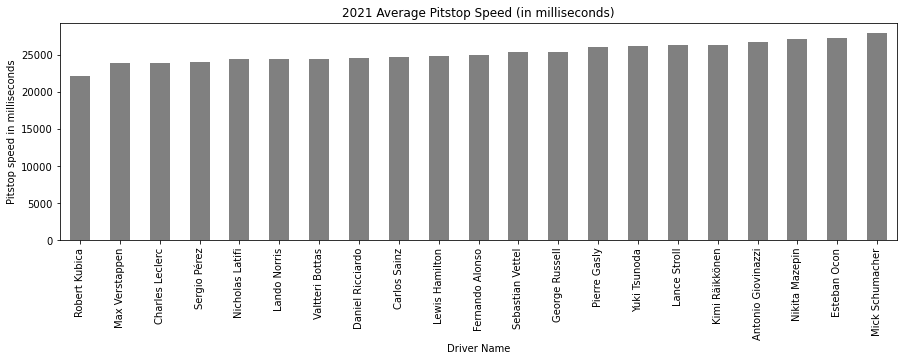

In [84]:
# PLOTTING THE 2021 AVERAGE PITSTOP SPEED PER DRIVER

print('GRAPH 8')
Driver_Pitstops_no_outliers.groupby(['full_name'])['milliseconds_pitstops'].mean().sort_values().plot(kind="bar", title = '2021 Average Pitstop Speed (in milliseconds)', color='grey', figsize=(15,4))
plt.xlabel('Driver Name')
plt.ylabel('Pitstop speed in milliseconds');

Above graph shows a clear distribution in pitstop speed in 2021 (average) - sorted from LOW to HIGh from left to right. 
What we can see is that Robert Kubica was the quickest in 2021 and Mick Schumacher the slowest in pitstops. 
Max Verstappen was the 2nd fastest, whereas Lewis Hamilton is right in the middle of the averages (10th). 
Did the slower pitstops cost Lewis Hamilton the championship?
We can also check all the pitstops in 2021 for both drivers with a scatterplot and see how both relate to eachother.

GRAPH 9


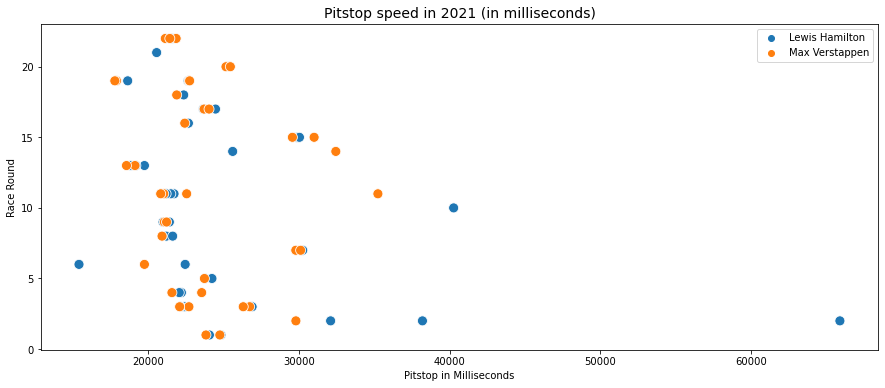

In [108]:
# CREATING A SCATTERPLOT ON PITSTOPS FOR BOTH MAX VERSTAPPEN AND LEWIS HAMILTON

# Creating the pitstop dataframes for both drivers
Max_pitstops_2021 = Driver_Pitstops_no_outliers[Driver_Pitstops_no_outliers.full_name == 'Max Verstappen']
Lewis_pitstops_2021 = Driver_Pitstops_no_outliers[Driver_Pitstops_no_outliers.full_name == 'Lewis Hamilton']

# Concatenating both dataframes to model them together in one scatterplot
concatenated = pd.concat([Lewis_pitstops_2021.assign(Lewis_pitstops_2021='milliseconds_pitstops'), Max_pitstops_2021.assign(Max_pitstops_2021='milliseconds_pitstops')])

# Creating the scatterplot
plt.figure(figsize=(15,6))
sns.scatterplot(x='milliseconds_pitstops', y='round', data=concatenated,
                hue='full_name', s=100)
plt.title('Pitstop speed in 2021 (in milliseconds)', size=14)
plt.xlabel('Pitstop in Milliseconds', size=10)
plt.ylabel('Race Round', size=10)
plt.legend();
print('GRAPH 9')
plt.show()

Above scatterplot shows the distribution of all pitstops taken in 2021 for both Lewis and Max. What we notice is that the biggest outliers (~ > 38000) are all for Lewis. The quickest pitstop is also for Lewis (~ 10000).
Between there is a pretty even distribution around the 20000 - 25000 mark. 

In [36]:
# WE CAN ALSO CHECK THE ACTUAL QUICKEST AND SLOWEST PITSTOPS IN 2021 BY USING A NUMPY ARRAY
 
# First we can convert the pitstop data to a numpy array
Pitstop_speed_data = Driver_Pitstops_no_outliers['milliseconds_pitstops'].to_numpy()
print('Numpy Array check:', end = ' ')
print(type(Pitstop_speed_data)) #To check if we did set up a numpy array 

print('')
print('The following data points are NOT based on the average pitstop speeds, but the actual individual pitstops.')
print('Quickest pitstop in 2021 in milliseconds is:', end = ' ')
print(Pitstop_speed_data.min())
print('Slowest pitstop in 2021 in milliseconds is:', end = ' ')
print(Pitstop_speed_data.max())

Numpy Array check: <class 'numpy.ndarray'>

The following data points are NOT based on the average pitstop speeds, but the actual individual pitstops.
Quickest pitstop in 2021 in milliseconds is: 14881
Slowest pitstop in 2021 in milliseconds is: 86440


# Conclusions

## Insights from Data Visualisation

My insights from above data visualisations are as follows. i have numbered my graphs ("GRAPH X") in above analysis, to make referring to them here a little easier. 
1. The 2021 season appears to have been a contest between only two drivers (Graph 2 & 3). From Race 1 onwards both Lewis and Max show an almost lineair line in points towards the last race. The other 3 drivers in the top 5 do not show a similar lineair increase and their points appear to be more fluctuating each race (Graph 3). That tells me that "the rest of the pack" were close to each other as well, but almost consistently finishing below Lewis and Max. 
2. Lewis Hamilton seems to be very constistent in his driving and his end result each season (Graph 4). When we look at Lewis' results since 2015 - as we were comparing Max vs Lewis in the years they drove together - we can see that Lewis is scoring an average of 383 points per season, and his 2021 result is well above that average. Max Verstappen on the other hand is scoring an average of 223 points per season since 2015 (and an average of 296 over the last 3 years only). Max seems to have outperformed himself in 2021 with a total of 395.5 points (well above his averages). 
3. When looking at the number of wins only (Graph 5), we can once again see that both Max and Lewis were close in that aspect as well. Max finished with 10 wins, where Lewis finished with 8 wins. There were only 4(!) other race winners in the whole season (of 22 races), and each of these 4 winners only won once. 
4. The average pitstop speed fluctuates per driver, however this would need to be seen in it's relative aspect. We are looking at milliseconds, so while the differences might look big, it is only relative to the sport and the importance of timing. It does look interesting that Max Verstappen's pitstops are  far quicker (relatively) than Lewis Hamilton, where Verstappen is second fastest and Lewis is tenth fastest. For two close contenders, that looks like a big difference to me.
5. Looking at the scatterplot for pitstop speed (Graph 5), it appears that Lewis has most of the outliers: the longest and well as the shortest pitstop(s). Most of their pitstops are very close together, centered around the 20k - 25k milliseconds. 



## Machine Learning

#### Future predictions using Machine Learning or Deep Learning
* Pitstop speed: based on historical data, per driver, per team and per race, machine learning could predict how long a pitstop will take. When handed enough data, machine learning could take weather aspects and/or damage to the car into account. An accurate prediction of pitstop speed could then be set. When for example team X can predict how long team Y's pitstop will take, it could use that information to try to adjust their own strategy during the race. 
* Driver behavior: based on historical data, per driver, per race and weather circumstances, machine learning could also predict a driver's race behavior. When does the driver brake in a certain corner, what lap does the driver tend the make their pitstop, do they make aggressive overtaking moves, what is their favorite overtaking angle (inside/outside), etc. When competing with one or two specific drivers in a season, one could utilise this data to specifically analyse their competitors and learn from their behavior to predict their moves. 
* I think these predictions could be prone to Deep Learning, as there are so many data points in Formula 1 that we could structure algorithms in layers (per element), that can be used to learn and provide intelligent suggestions to the teams. 

#### Classification or Regression Modelling
* For future machine learning on this data, I would choose Regression moddeling. The reason for that is that we do not need a simple label as our output, as we get with Classification modelling, but we need a continous variable as our output. We need to know the timing of race events and the time it takes.
    *  For example: team X does not simply want to know whether team Y will make a pitstop or not (pitstop: yes/no), but when does this pitstop happen, how long will it take, etc.

# The End. Thanks for reading!